# Урок 3. Популярные параметрические и непараметрические тесты

## Домашнее задание  
Поработаем с таблицами, для которых на предыдущем занятии вы изучали описательные статистики.
Сформулируйте несколько гипотез для 2 групп, которые можно проверить на имеющихся данных. Укажите, зависимые или независимые выборки, ЗП, НП.
Выберите подходящий тест и проверьте ваши предположения.

Задание выполняется на языке R и предоставляется в формате Google Colab

### Чтение файлов

In [ ]:
install.packages("tidyverse")
install.packages("readxl")
install.packages("writexl")
# install.packages("skimr")
# install.packages("psych")
# install.packages("gridExtra")
# install.packages("moments")
install.packages("fitdistrplus")
install.packages("data.table")
install.packages("car")
install.packages("lsr")
install.packages("effsize")
install.packages("GGally")
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)
library(dplyr)
require(readxl)
library(writexl)
# library(skimr)
# library(psych)
library(ggplot2)
# library(gridExtra)
# library(moments)
library(fitdistrplus)
library(car)
library(lsr)
library(effsize)
library(GGally)
library(corrplot)

corrplot 0.92 loaded



In [ ]:
data <- read_xlsx("/content/21_3_files/data.xlsx", sheet = 1) %>%
  rename_with(make.names)
data

New names:
• `Choi...25` -> `Choi...21`
• `Tgi...26` -> `Tgi...22`
• `HDLi...27` -> `HDLi...23`
• `LDLi...28` -> `LDLi...24`
• `Choi...29` -> `Choi...25`
• `Tgi...30` -> `Tgi...26`
• `HDLi...31` -> `HDLi...27`
• `LDLi...32` -> `LDLi...28`


Vial.number,Group,Age,Plasma.volume,Ht,Wt,BMI,Sys,Dia,PR,⋯,G1.LDLi,G2.LDLi,G3.LDLi,S0.LDLi,S1.LDLi,S2.LDLi,S3.LDLi,B.LDLi,F.LDLi,HM.LDLi
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,63,6.5,163,84.0,31.61579,125,76,67,⋯,4.090,68.910,3.570,3.980,28.180,42.460,1.950,0.020,1.67,13.02
2,0,47,5.5,179,111.0,34.64311,125,82,65,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,1,57,7.0,164,80.0,29.74420,132,80,92,⋯,5.160,68.220,3.110,4.640,30.430,39.860,1.560,0.020,1.69,14.16
4,1,72,5.0,160,58.8,22.96875,130,90,68,⋯,3.950,68.030,4.500,3.780,29.370,41.130,2.200,0.020,1.89,13.89
5,1,57,5.0,180,71.0,21.91358,135,75,70,⋯,4.630,66.910,4.030,4.440,28.540,40.640,1.950,0.020,2.03,14.25
6,1,79,6.2,160,64.0,25.00000,110,75,66,⋯,4.050,64.010,5.270,3.720,26.710,40.390,2.510,0.020,2.70,16.06
7,1,61,6.5,164,67.0,24.91077,124,82,84,⋯,4.100,65.990,4.700,4.030,28.440,39.990,2.330,0.020,1.61,13.82
8,1,70,5.5,162,61.0,23.24341,135,78,72,⋯,5.270,67.260,3.240,4.690,32.270,37.290,1.520,0.030,1.61,14.59
9,0,50,6.0,150,79.0,35.11111,142,95,88,⋯,3.970,67.590,4.220,4.420,27.990,41.190,2.180,0.050,1.55,13.26


In [ ]:
names(data)

[1] "Vial.number"      "Group"            "Age"             
  [4] "Plasma.volume"    "Ht"               "Wt"              
  [7] "BMI"              "Sys"              "Dia"             
 [10] "PR"               "Sm"               "Dm"              
 [13] "HT"               "LVH"              "IHD"             
 [16] "MI"               "Str"              "A_C"             
 [19] "A_H"              "A_D"              "Choi...21"       
 [22] "Tgi...22"         "HDLi...23"        "LDLi...24"       
 [25] "Choi...25"        "Tgi...26"         "HDLi...27"       
 [28] "LDLi...28"        "AI"               "r.lat.min"       
 [31] "r.ant.min"        "r.pos.min"        "l.lat.min"       
 [34] "l.ant.min"        "l.pos.min"        "r.lat.max"       
 [37] "r.ant.max"        "r.pos.max"        "l.lat.max"       
 [40] "l.ant.max"        "l.pos.max"        "carotid.IMT.mean"
 [43] "Plaque"           "Statins"          "GPHDL1"          
 [46] "GPHDL2"           "GPHDL3"           "GPHDL4"          
 [49] "GPHDL5"           "GPHDL6"           "GPHDL7"          
 [52] "GPHDL8"           "GPHDL9"           "GPHDL10"         
 [55] "GPHDL11"          "GPHDL12"          "GPHDL13"         
 [58] "GPHDL14"          "GPHDL15"          "GPHDL16"         
 [61] "GPHDL17"          "GPHDL18"          "GPHDL19"         
 [64] "GPHDL20"          "GPHDL21"          "GPHDL22"         
 [67] "sum_auc.HDLi"     "LB.HDLi"          "HB.HDLi"         
 [70] "G1.HDLi"          "G2.HDLi"          "G3.HDLi"         
 [73] "S0.HDLi"          "S1.HDLi"          "S2.HDLi"         
 [76] "S3.HDLi"          "B.HDLi"           "F.HDLi"          
 [79] "HM.HDLi"          "GPLDL1"           "GPLDL2"          
 [82] "GPLDL3"           "GPLDL4"           "GPLDL5"          
 [85] "GPLDL6"           "GPLDL7"           "GPLDL8"          
 [88] "GPLDL9"           "GPLDL10"          "GPLDL11"         
 [91] "GPLDL12"          "GPLDL13"          "GPLDL14"         
 [94] "GPLDL15"          "GPLDL16"          "GPLDL17"         
 [97] "GPLDL18"          "GPLDL19"          "GPLDL20"         
[100] "GPLDL21"          "GPLDL22"          "sum_auc.LDLi"    
[103] "LB.LDLi"          "HB.LDLi"          "G1.LDLi"         
[106] "G2.LDLi"          "G3.LDLi"          "S0.LDLi"         
[109] "S1.LDLi"          "S2.LDLi"          "S3.LDLi"         
[112] "B.LDLi"           "F.LDLi"           "HM.LDLi"

In [ ]:
# Создадим список колонок, которые мы переведем в Factor
factor_cols <- c("Vial.number", "Group", "Sm", "Dm", "HT", "LVH", "IHD", "MI", "Str", "A_C", "A_H", "A_D", "Plaque", "Statins")

In [ ]:
# Напишем функцию, которая переведет колонки в Factor и Numeric

convert_columns <- function(data, columns) {
  data <- mutate(data, across(all_of(columns), as.factor),
                        across(!all_of(columns), as.numeric))
  return(data)
}

In [ ]:
# Применим функцию к нашей объединённой таблице
data <- convert_columns(data, factor_cols)
data

Vial.number,Group,Age,Plasma.volume,Ht,Wt,BMI,Sys,Dia,PR,⋯,G1.LDLi,G2.LDLi,G3.LDLi,S0.LDLi,S1.LDLi,S2.LDLi,S3.LDLi,B.LDLi,F.LDLi,HM.LDLi
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,63,6.5,163,84.0,31.61579,125,76,67,⋯,4.090,68.910,3.570,3.980,28.180,42.460,1.950,0.020,1.67,13.02
2,0,47,5.5,179,111.0,34.64311,125,82,65,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,1,57,7.0,164,80.0,29.74420,132,80,92,⋯,5.160,68.220,3.110,4.640,30.430,39.860,1.560,0.020,1.69,14.16
4,1,72,5.0,160,58.8,22.96875,130,90,68,⋯,3.950,68.030,4.500,3.780,29.370,41.130,2.200,0.020,1.89,13.89
5,1,57,5.0,180,71.0,21.91358,135,75,70,⋯,4.630,66.910,4.030,4.440,28.540,40.640,1.950,0.020,2.03,14.25
6,1,79,6.2,160,64.0,25.00000,110,75,66,⋯,4.050,64.010,5.270,3.720,26.710,40.390,2.510,0.020,2.70,16.06
7,1,61,6.5,164,67.0,24.91077,124,82,84,⋯,4.100,65.990,4.700,4.030,28.440,39.990,2.330,0.020,1.61,13.82
8,1,70,5.5,162,61.0,23.24341,135,78,72,⋯,5.270,67.260,3.240,4.690,32.270,37.290,1.520,0.030,1.61,14.59
9,0,50,6.0,150,79.0,35.11111,142,95,88,⋯,3.970,67.590,4.220,4.420,27.990,41.190,2.180,0.050,1.55,13.26


In [ ]:
pair_cols <- c('Ht', 'Wt', 'BMI', 'Sys', 'Dia', 'PR', 'Sm', 'Dm', 'HT', 'LVH', 'IHD', 'MI', 'Str', 'A_C', 'A_H', 'A_D', 'AI', 'r.lat.min', 'r.ant.min', 'r.pos.min', 'l.lat.min', 'l.ant.min', 'l.pos.min', 'r.lat.max', 'r.ant.max', 'r.pos.max', 'l.lat.max', 'l.ant.max', 'l.pos.max', 'carotid.IMT.mean', 'Plaque', 'Statins')

In [ ]:
# pair <- data[sapply(data, is.factor)]
# names(num_cols)

[1] "Vial.number" "Group"       "Sm"          "Dm"          "HT"         
 [6] "LVH"         "IHD"         "MI"          "Str"         "A_C"        
[11] "A_H"         "A_D"         "Plaque"      "Statins"

In [ ]:
options(repr.plot.width = 25, repr.plot.height = 25)
ggpairs (data,
        columns = pair_cols,
        mapping = aes(color = Group),
        lower = list(combo = wrap("facethist", binwidth=0.8)))

Output hidden; open in https://colab.research.google.com to view.

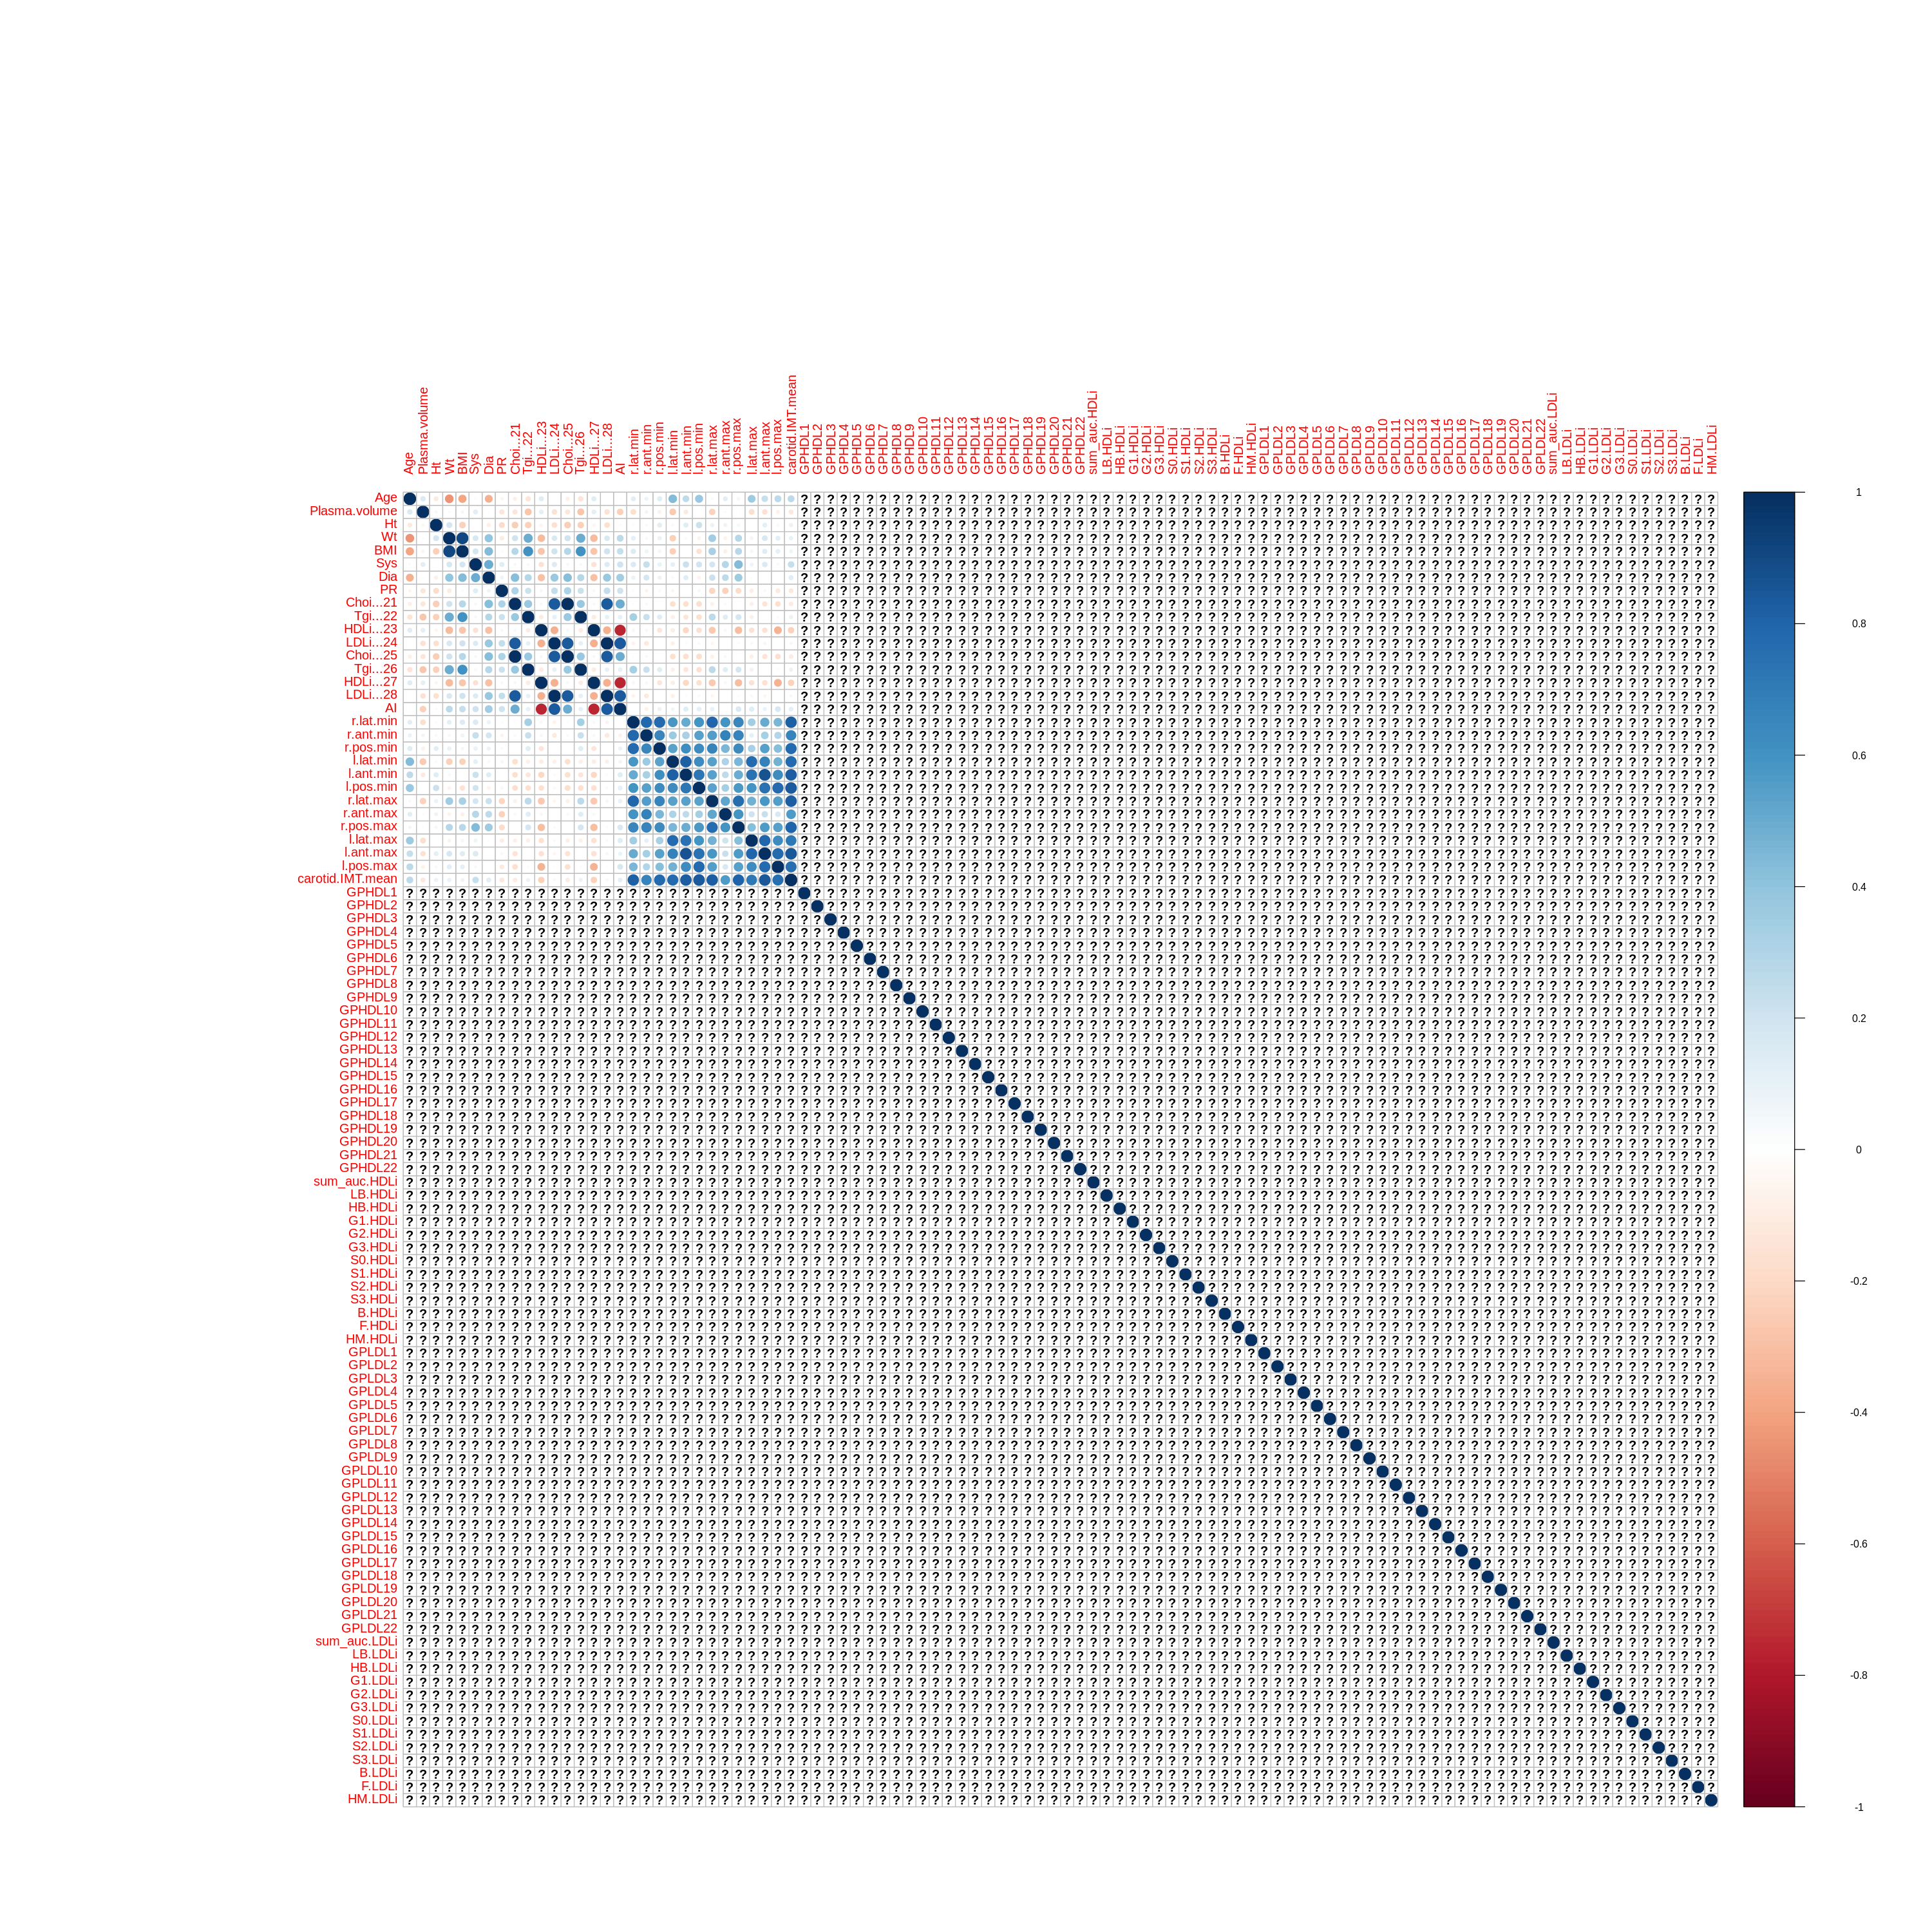

In [ ]:
corrplot(cor(select_if(data, is.numeric)))

### Гипотеза 1  
Пациенты принимающие статины имеют более низкий уровень холестерина (LDLi) по сравнению с теми, кто не принимает статины.

    H0: Средние значения уровня холестерина LDLi одинаковы для обеих групп (принимающих статины и не принимающих).
    H1: Средние значения уровня холестерина LDLi различаются между группами.
    Тип выборок: Независимые выборки.
    Независимая переменная: 'Statins'
    Зависимая переменная: 'LDLi'
    Предположения: Нормальное распределение уровня холестерина LDLi в каждой группе, равенство дисперсий между группами.
    Подходящий тест: t-тест для независимых выборок.

Проверим распределние переменной "LDLi"

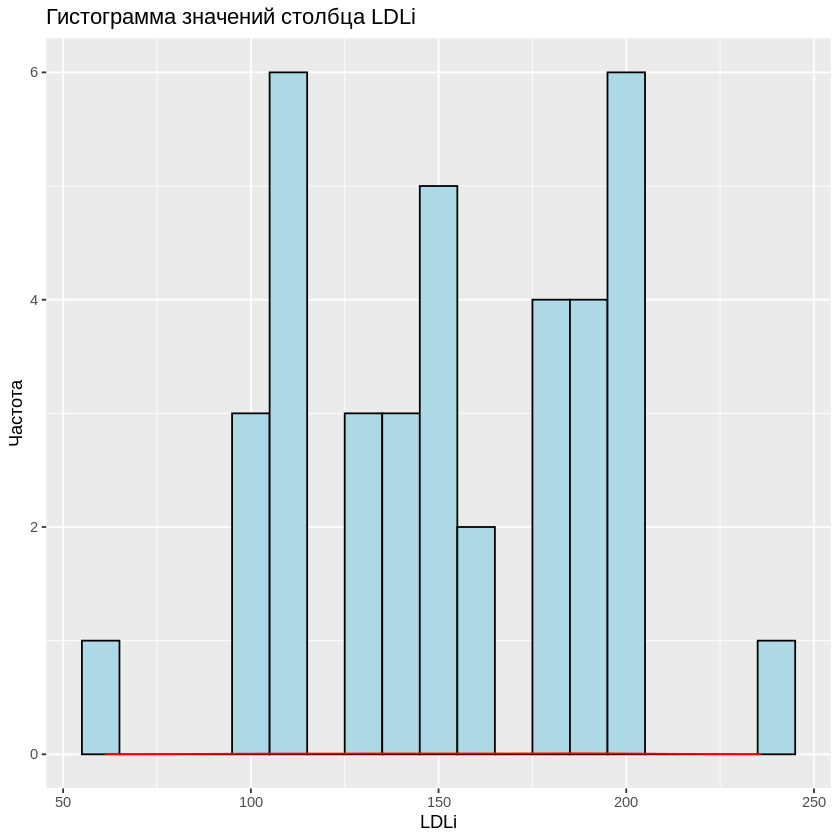

In [ ]:
ggplot(data, aes(LDLi...24)) +
  geom_histogram(binwidth = 10, fill = "lightblue", color = "black") +
  geom_density(color = "red") +
  labs(title = paste("Гистограмма значений столбца LDLi"),
         x = "LDLi",
         y = "Частота")

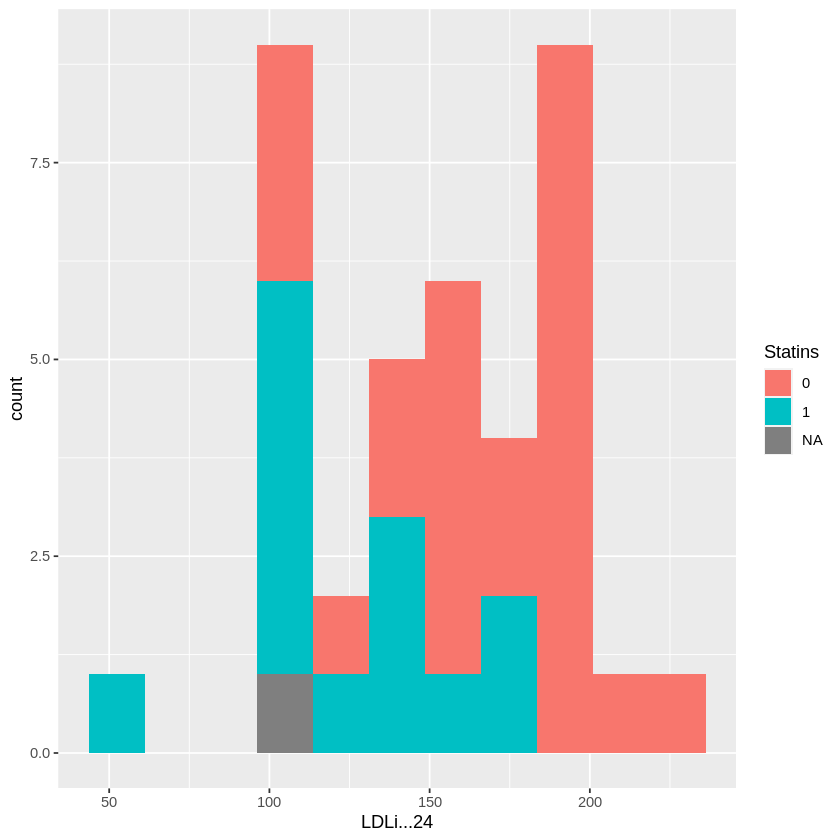

In [ ]:
# График с разделением по группам
ggplot(data, aes(LDLi...24, fill = Statins)) +
  geom_histogram(bins = 11)

Судя по кривой распределения у данной переменной бимодальное распределение, либо бета-распределение. Проведем дополнительные тесты.

Fitting of the distribution ' norm ' by maximum likelihood 
Parameters : 
      estimate Std. Error
mean 152.33421   6.429638
sd    39.63495   4.546440
Loglikelihood:  -193.7487   AIC:  391.4974   BIC:  394.7726 
Correlation matrix:
     mean sd
mean    1  0
sd      0  1


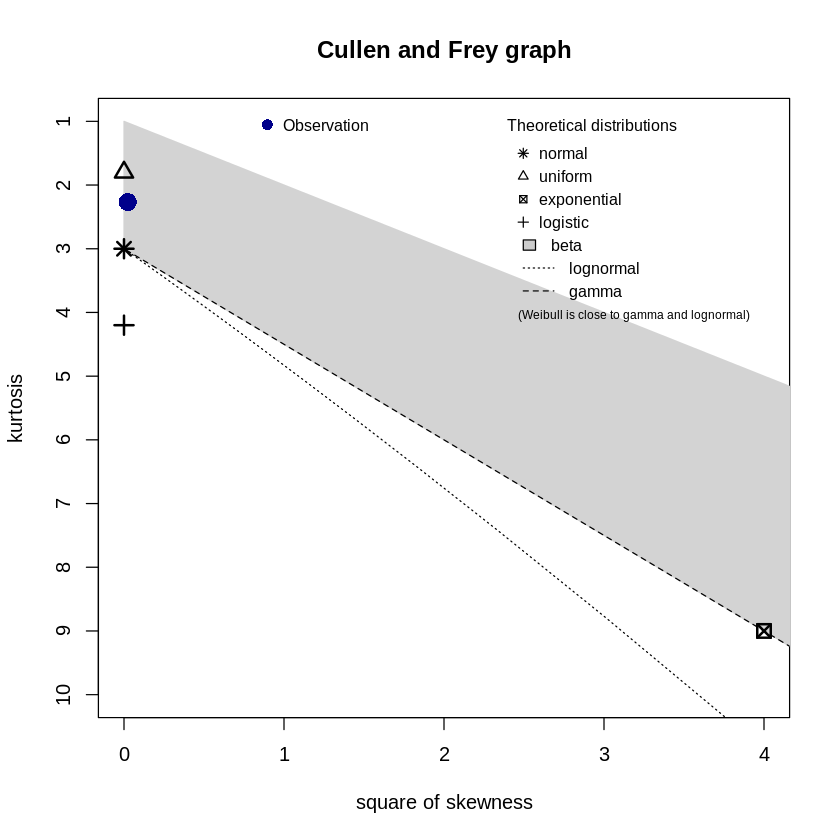

In [ ]:
desc <- descdist(data$LDLi...24, discrete = FALSE)

best_fit <- fitdist(data$LDLi...24, "norm")
summary(best_fit)

Судя по графу Куллена и Фрея распределение данная переменная имеет бета-распределение.

In [ ]:
# Список всех распределений
possible_distributions <- c("norm", "lnorm", "exp", "gamma", "weibull", "logis", "pois")

Применим функцию, которая выведет наиболее подходящее по параметрам распреледение

<simpleError in optim(par = vstart, fn = fnobj, fix.arg = fix.arg, obs = data,     gr = gradient, ddistnam = ddistname, hessian = TRUE, method = meth,     lower = lower, upper = upper, ...): initial value in 'vmmin' is not finite>
Fitting of the distribution ' weibull ' by maximum likelihood 
Parameters : 
        estimate Std. Error
shape   4.418751  0.5714549
scale 167.410344  6.4734212
Loglikelihood:  -193.3097   AIC:  390.6193   BIC:  393.8945 
Correlation matrix:
          shape     scale
shape 1.0000000 0.3138323
scale 0.3138323 1.0000000



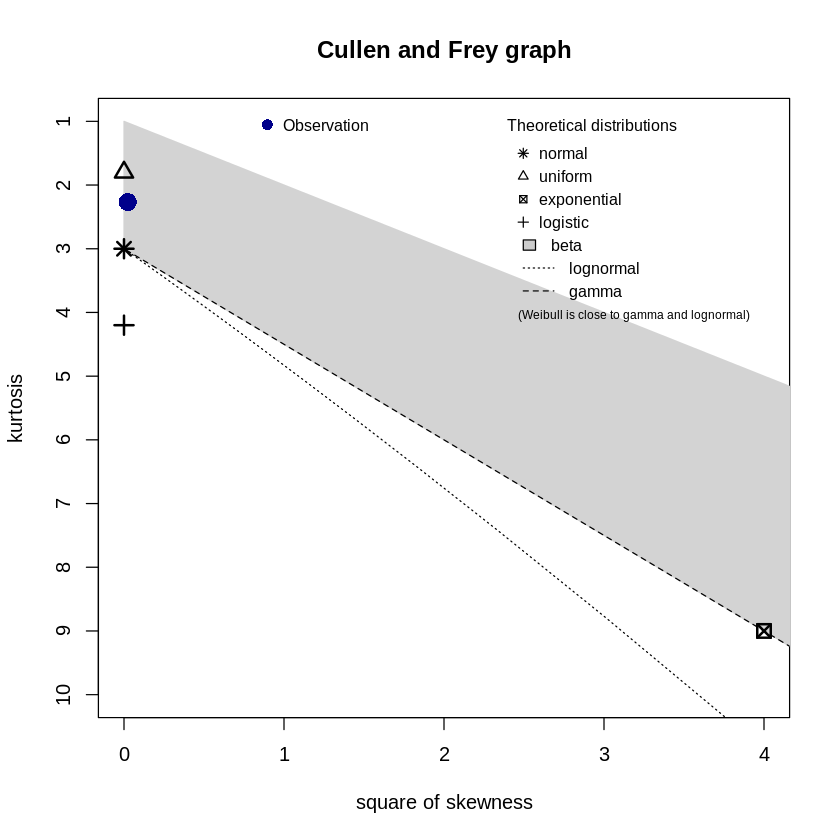

In [ ]:
desc <- descdist(data$LDLi...24, discrete = FALSE)

best_fit <- NULL
best_summary <- NULL

for (dist in possible_distributions) {
  fit <- tryCatch(fitdist(data$LDLi...24, dist), error = function(e) e)
  if (!inherits(fit, "error")) {
    summary_fit <- summary(fit)
    if (is.null(best_fit) || summary_fit$loglik > best_summary$loglik) {
      best_fit <- fit
      best_summary <- summary_fit
    }
  }
}

if (!is.null(best_fit)) {
  print(best_summary)
} else {
  print("No suitable distribution found.")
}

Функция выдает наиболее подходщим распределение Вейбулла.

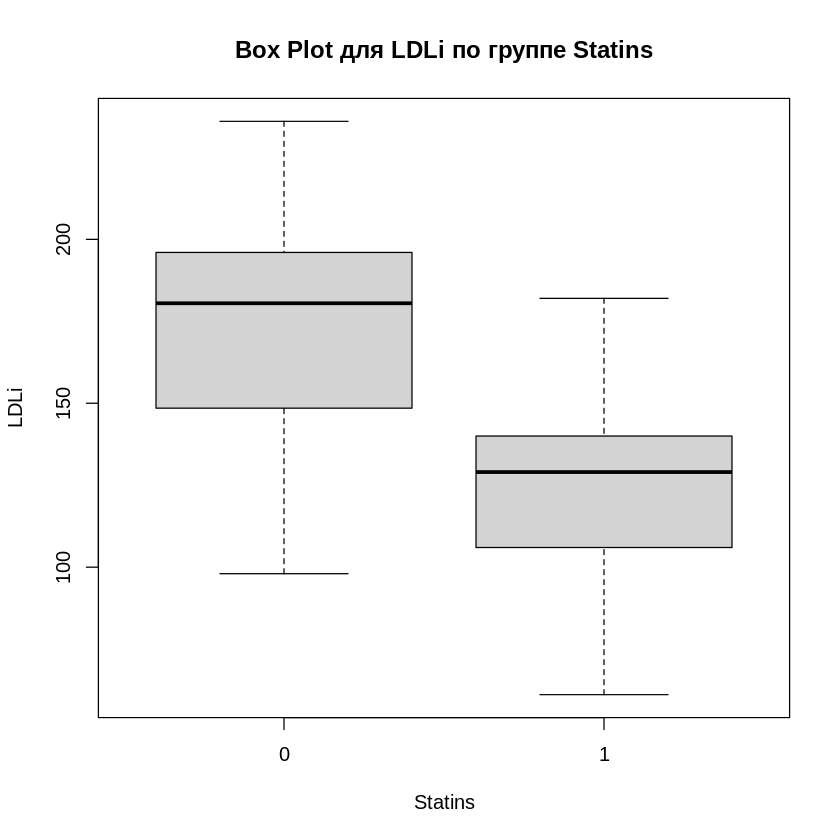

In [ ]:
# Создание dataframe
df_1 <- data.frame(LDLi = data$LDLi...24, Statins = data$Statins)

# Построение box plot
boxplot(LDLi ~ Statins, data = df_1, xlab = "Statins", ylab = "LDLi", main = "Box Plot для LDLi по группе Statins")

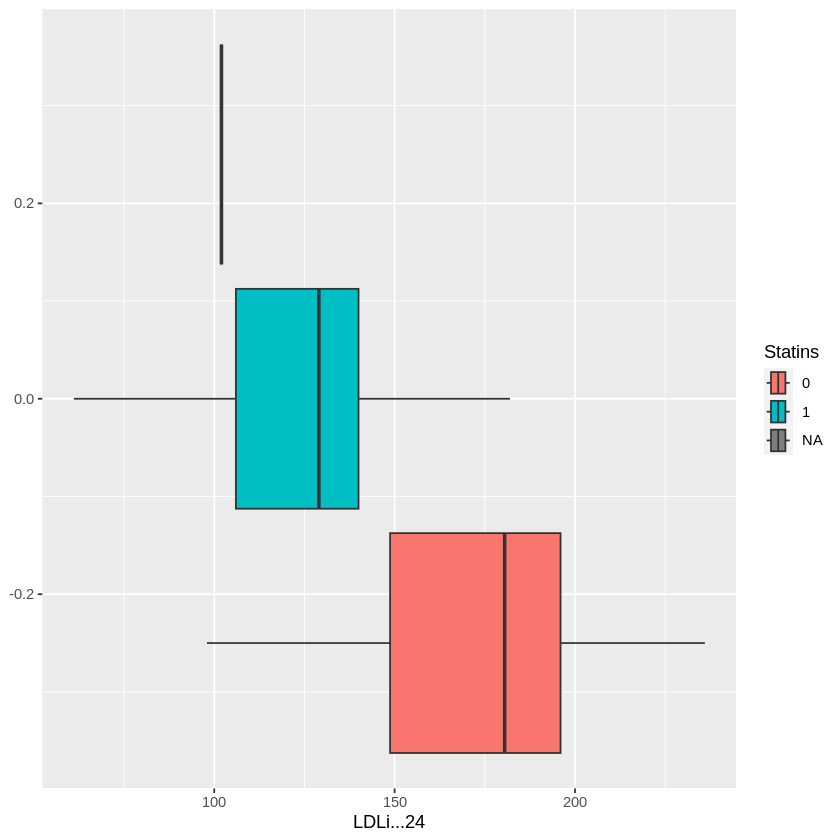

In [ ]:
ggplot(data, aes(LDLi...24, fill = Statins)) +
  geom_boxplot()

Попробуем провести t-тест для этой гипотезы

In [ ]:
# Выбор значений уровня холестерина LDLi для пользователей статинов и непользователей
ldli_statins <- data[data$Statins == 1, "LDLi...24"]
ldli_non_statins <- data[data$Statins == 0, "LDLi...24"]

# Проведение t-теста
t_test_result <- t.test(ldli_statins, ldli_non_statins)

# Вывод результатов теста
print(t_test_result)


	Welch Two Sample t-test

data:  ldli_statins and ldli_non_statins
t = -3.5531, df = 25.782, p-value = 0.001495
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -66.17090 -17.65538
sample estimates:
mean of x mean of y 
 126.5077  168.4208 



Как видно из графиков box plot и результатов t-теста (p-value = 0.001495) уровень липидов низкой плотности значимо различается в группах принимавших статины и не принимавших статины. Дисперсии не равны. Следовательно верна альтернативная гипотеза $H_1$.



---

### Дополнительные функции из вебинара

In [ ]:
# размер эффекта для t-теста (d Коэна)
data %>%
  lsr::cohensD(formula = LDLi...24 ~ Statins, data = .)

[1] 1.205916

In [ ]:
data %>%
  effsize::cohen.d(formula = LDLi...24 ~ Statins, data = ., conf.level = 0.95)


Cohen's d

d estimate: 1.205916 (large)
95 percent confidence interval:
    lower     upper 
0.4511045 1.9607272 


In [ ]:
data %>%
  wilcox.test(formula = LDLi...24 ~ Statins, data = ., conf.level = 0.95)
# Применение "paired = FALSE" дает ошибку

Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  LDLi...24 by Statins
W = 254.5, p-value = 0.001813
alternative hypothesis: true location shift is not equal to 0


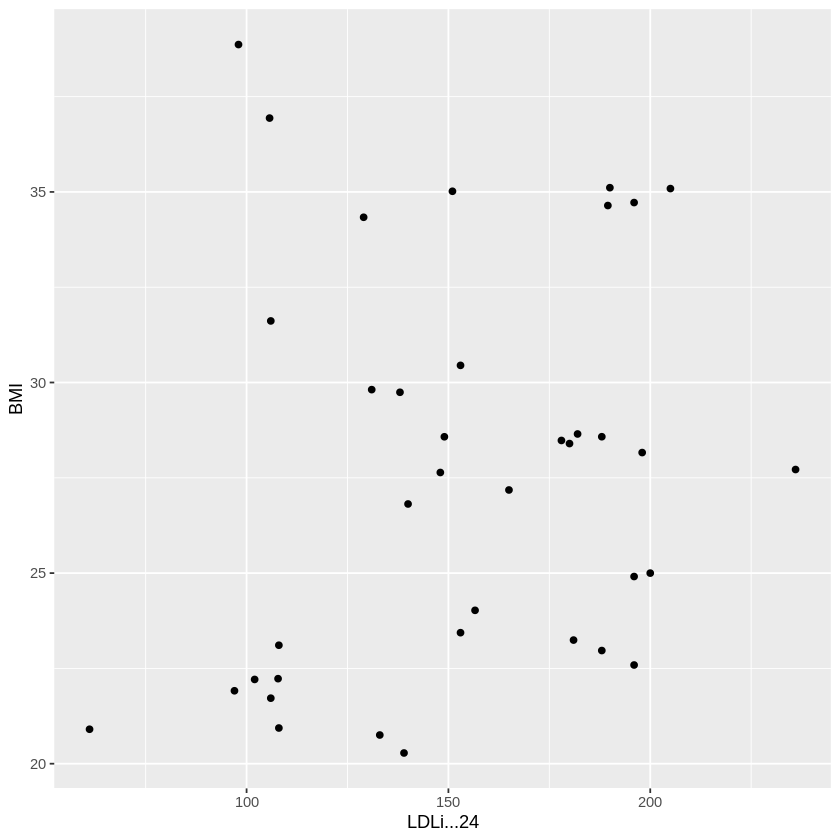

In [ ]:
ggplot(data, aes(LDLi...24, BMI)) +
  geom_point()

In [ ]:
cor.test(data$LDLi...24, data$BMI, conf.level = 0.95)


	Pearson's product-moment correlation

data:  data$LDLi...24 and data$BMI
t = 1.2507, df = 36, p-value = 0.2191
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1236889  0.4916722
sample estimates:
      cor 
0.2040634 


In [ ]:
ctable <- data %>%
  dplyr::select(Statins, Plaque) %>%
  table()
ctable

       Plaque
Statins  0  1  2  3
      0  3  9 12  0
      1  0  5  5  3

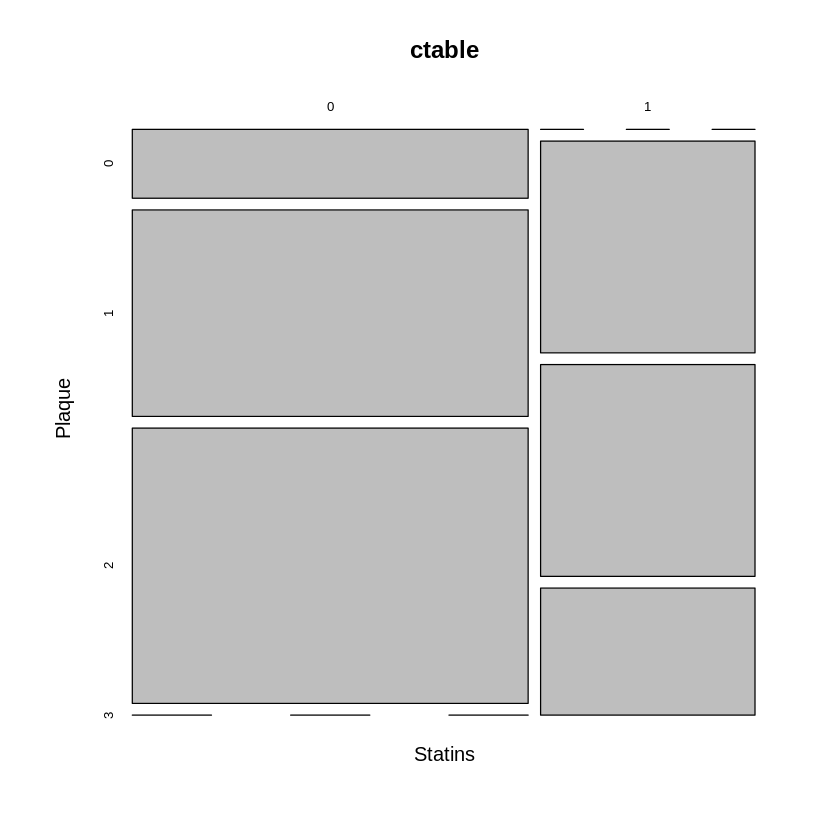

In [ ]:
mosaicplot(ctable)

In [ ]:
ctable <- data %>%
  dplyr::select(Statins, Plaque) %>%
  table() %>%
  addmargins()
ctable

,0,1,2,3,Sum
0,3,9,12,0,24
1,0,5,5,3,13
Sum,3,14,17,3,37


In [ ]:
fisher.test(ctable, conf.level = gamma)


	Fisher's Exact Test for Count Data

data:  ctable
p-value = 0.589
alternative hypothesis: two.sided




---



### Гипотеза 2  
Пациенты принимающие статины имеют меньший размер бляшек холестерина (Plaque) по сравнению с теми, кто не принимает статины.

    H0: Средние значения размера бляшек Plaque одинаковы для обеих групп (принимающих статины и не принимающих).
    H1: Средние значения размера бляшек Plaque различаются между группами.
    Тип выборок: Независимые выборки.
    Независимая переменная: 'Statins'
    Зависимая переменная: 'Plaque'
    Предположения: Нормальное распределение значений размера бляшек Plaque в каждой группе, равенство дисперсий между группами.
    Подходящий тест: t-тест для независимых выборок.

In [ ]:
# Создание dataframe
df_2 <- data.frame(Plaque = as.numeric(as.character(data$Plaque)), Statins = as.factor(data$Statins))

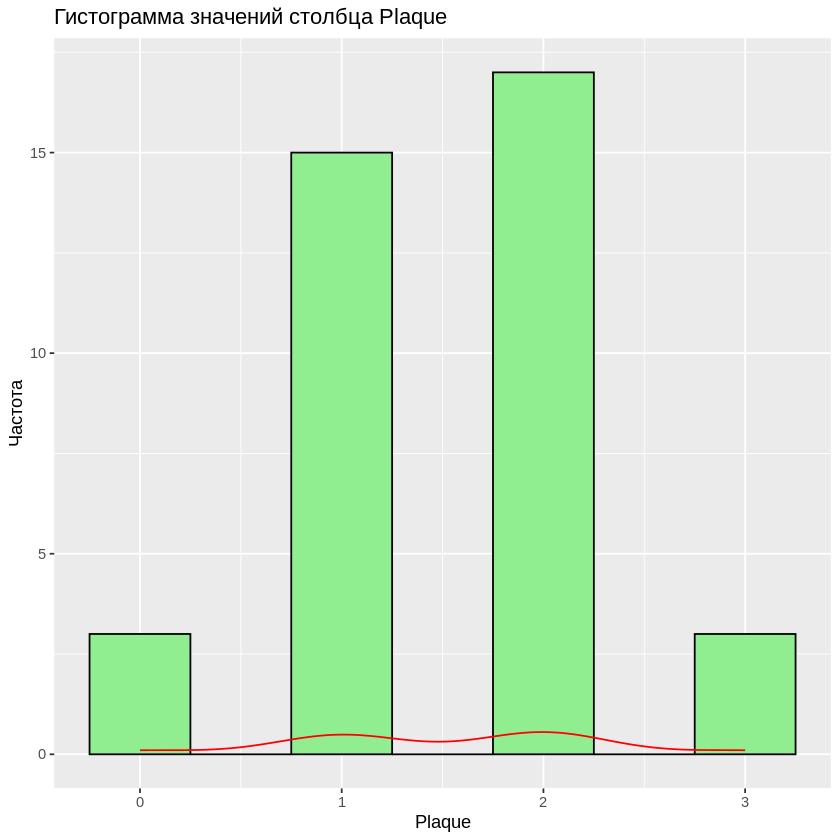

In [ ]:
ggplot(df_2, aes(x = Plaque)) +
  geom_histogram(binwidth = 0.5, fill = "lightgreen", color = "black") +
  geom_density(color = "red") +
  labs(title = paste("Гистограмма значений столбца Plaque"),
         x = "Plaque",
         y = "Частота")

Error in computing default starting values.
<simpleError in optim(par = vstart, fn = fnobj, fix.arg = fix.arg, obs = data,     gr = gradient, ddistnam = ddistname, hessian = TRUE, method = meth,     lower = lower, upper = upper, ...): function cannot be evaluated at initial parameters>
Fitting of the distribution ' norm ' by maximum likelihood 
Parameters : 
      estimate Std. Error
mean 1.5263158 0.12194660
sd   0.7517293 0.08622858
Loglikelihood:  -43.07526   AIC:  90.15053   BIC:  93.4257 
Correlation matrix:
              mean            sd
mean  1.000000e+00 -9.339446e-12
sd   -9.339446e-12  1.000000e+00



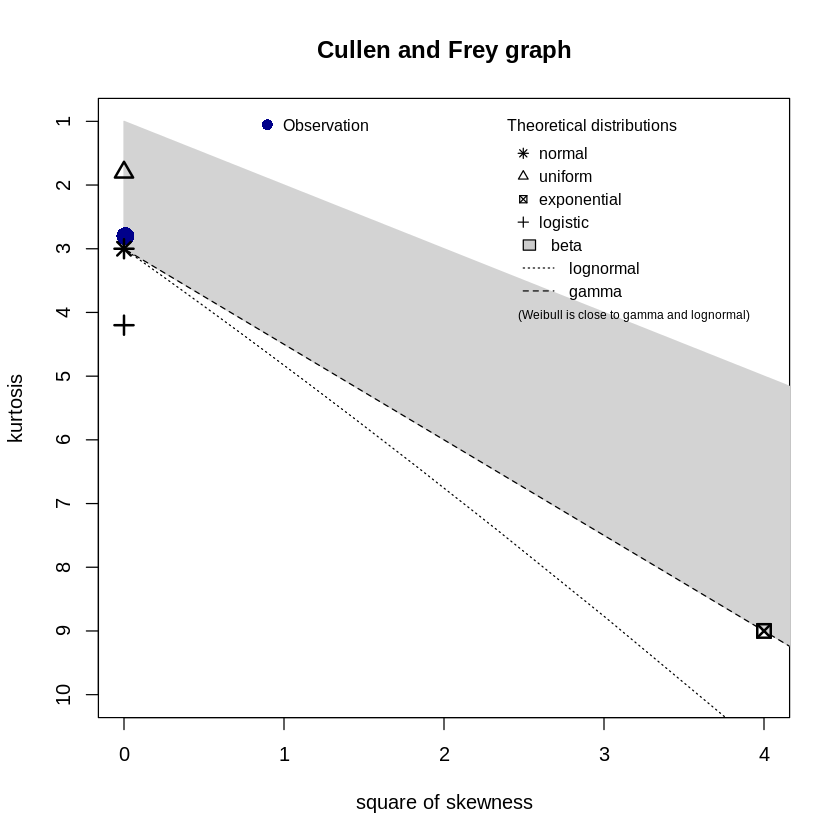

In [ ]:
desc <- descdist(df_2$Plaque, discrete = FALSE)

best_fit <- NULL
best_summary <- NULL

for (dist in possible_distributions) {
  fit <- tryCatch(fitdist(df_2$Plaque, dist), error = function(e) e)
  if (!inherits(fit, "error")) {
    summary_fit <- summary(fit)
    if (is.null(best_fit) || summary_fit$loglik > best_summary$loglik) {
      best_fit <- fit
      best_summary <- summary_fit
    }
  }
}

if (!is.null(best_fit)) {
  print(best_summary)
} else {
  print("No suitable distribution found.")
}

Распределение переменной Plaque близко к нормальному

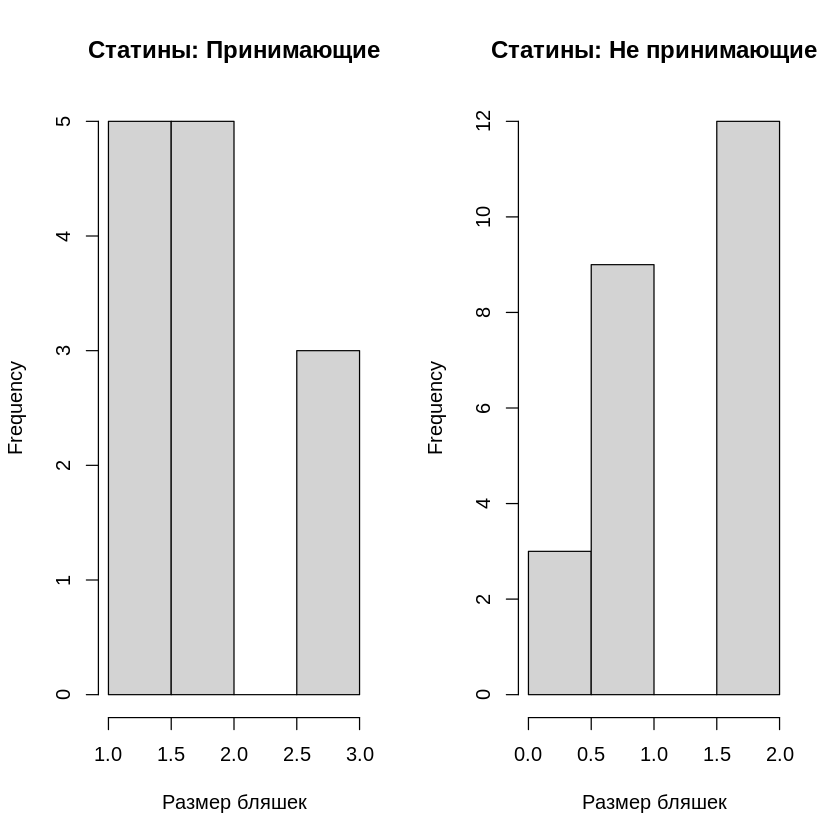

In [ ]:
# Гистограммы
par(mfrow = c(1, 2)) # Расположение графиков
hist(df_2[df_2$Statins == 1, "Plaque"], main = "Статины: Принимающие", xlab = "Размер бляшек")
hist(df_2[df_2$Statins == 0, "Plaque"], main = "Статины: Не принимающие", xlab = "Размер бляшек")

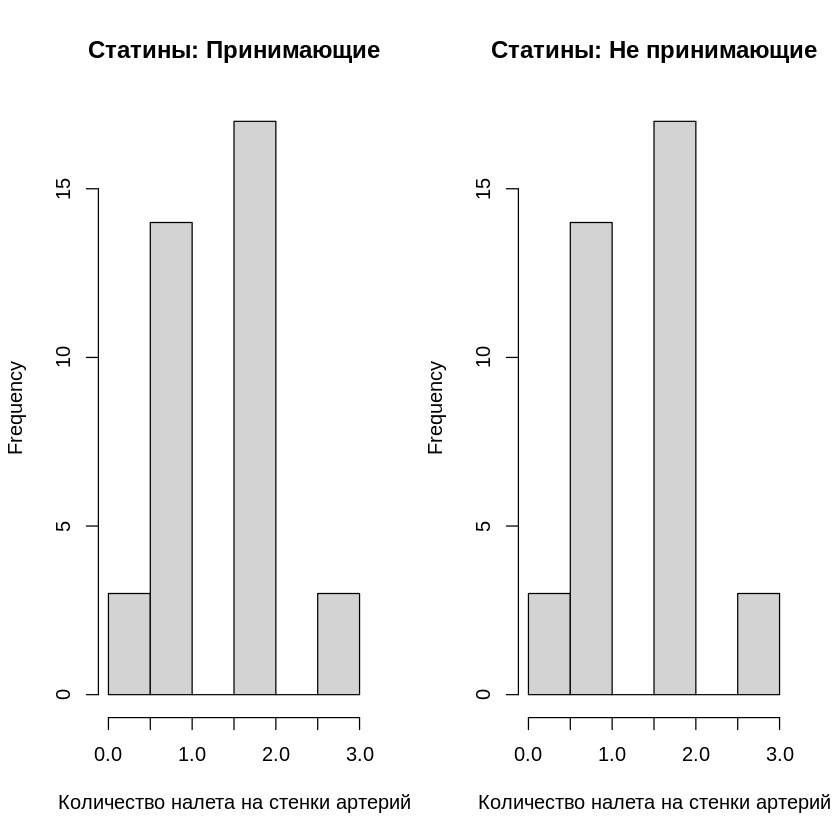

In [ ]:
# hist(df_2$Plaque, main = "Статины: Не принимающие", xlab = "Размер бляшек")
par(mfrow = c(1, 2)) # Расположение графиков
hist(df_2[!is.na(df_2$Statins == 1), "Plaque"], main = "Статины: Принимающие", xlab = "Количество налета на стенки артерий")
hist(df_2[!is.na(df_2$Statins == 0), "Plaque"], main = "Статины: Не принимающие", xlab = "Количество налета на стенки артерий")

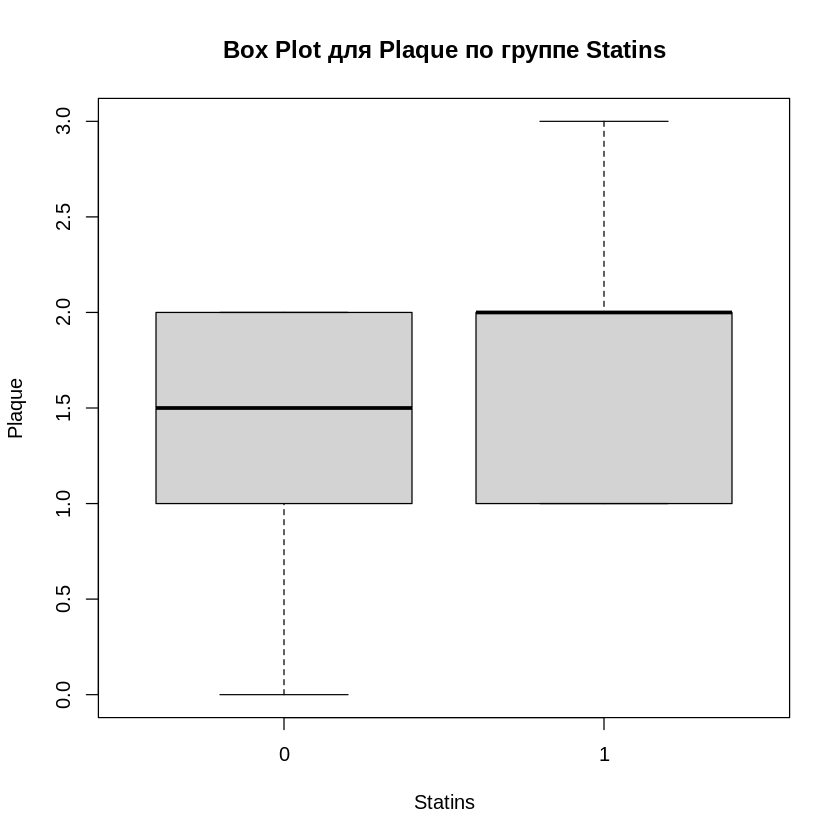

In [ ]:
# Построение box plot
boxplot(Plaque ~ Statins, data = df_2, xlab = "Statins", ylab = "Plaque", main = "Box Plot для Plaque по группе Statins")

In [ ]:
# Тест Левена для проверки однородности дисперсий
df_2$Plaque <- as.numeric(as.character(df_2$Plaque))
leveneTest(Plaque ~ Statins, data = df_2)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.004785561,0.9452419
,35,NA,NA


Тест Левина показал неоднородность дисперсий в двух группах.

In [ ]:
t.test(Plaque ~ Statins, data = df_2)


	Welch Two Sample t-test

data:  Plaque by Statins
t = -1.7761, df = 22.315, p-value = 0.08935
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -1.02084470  0.07853701
sample estimates:
mean in group 0 mean in group 1 
       1.375000        1.846154 


По гистограммам, графикам box plot и результатам t-теста видим, что статистически значимых различий между группами нет. Различаются только средние значения в двух группах. При этом интервалы значений полностью совпадают. Следовательна верна нулевая гипотеза.

### Гипотеза 3  
Пациенты принимающие статины имеют меньший показатель средней толщины комплекса интима-медиа сонных артерий (carotid.IMT.mean) по сравнению с теми, кто не принимает статины.

    H0: Среднeе значениe толщины комплекса интима-медиа сонных артерий carotid.IMT.mean одинаковы для обеих групп (принимающих статины и не принимающих).
    H1: Среднeе значениe толщины комплекса интима-медиа сонных артерий carotid.IMT.mean различаются между группами.
    Тип выборок: Независимые выборки.
    Независимая переменная: 'Statins'
    Зависимая переменная: 'carotid.IMT.mean'
    Предположения: Нормальное распределение средней толщины комплекса интима-медиа сонных артерий carotid.IMT.mean в каждой группе, равенство дисперсий между группами.
    Подходящий тест: t-тест для независимых выборок.

In [ ]:
# Создание dataframe
df_3 <- data.frame(carotid.IMT.mean = data$carotid.IMT.mean, Statins = data$Statins)

<simpleError in optim(par = vstart, fn = fnobj, fix.arg = fix.arg, obs = data,     gr = gradient, ddistnam = ddistname, hessian = TRUE, method = meth,     lower = lower, upper = upper, ...): initial value in 'vmmin' is not finite>
Fitting of the distribution ' norm ' by maximum likelihood 
Parameters : 
      estimate Std. Error
mean 0.8074781 0.01991038
sd   0.1227359 0.01407456
Loglikelihood:  25.79373   AIC:  -47.58745   BIC:  -44.31228 
Correlation matrix:
             mean           sd
mean 1.000000e+00 2.488942e-13
sd   2.488942e-13 1.000000e+00



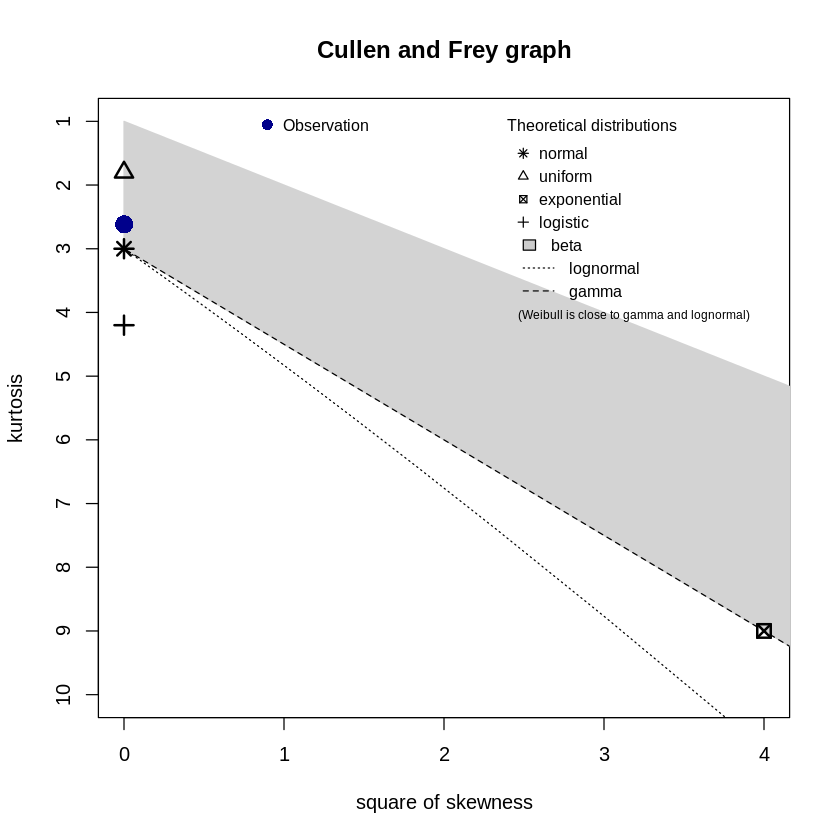

In [ ]:
desc <- descdist(df_3$carotid.IMT.mean, discrete = FALSE)

best_fit <- NULL
best_summary <- NULL

for (dist in possible_distributions) {
  fit <- tryCatch(fitdist(df_3$carotid.IMT.mean, dist), error = function(e) e)
  if (!inherits(fit, "error")) {
    summary_fit <- summary(fit)
    if (is.null(best_fit) || summary_fit$loglik > best_summary$loglik) {
      best_fit <- fit
      best_summary <- summary_fit
    }
  }
}

if (!is.null(best_fit)) {
  print(best_summary)
} else {
  print("No suitable distribution found.")
}

[1] 3 1

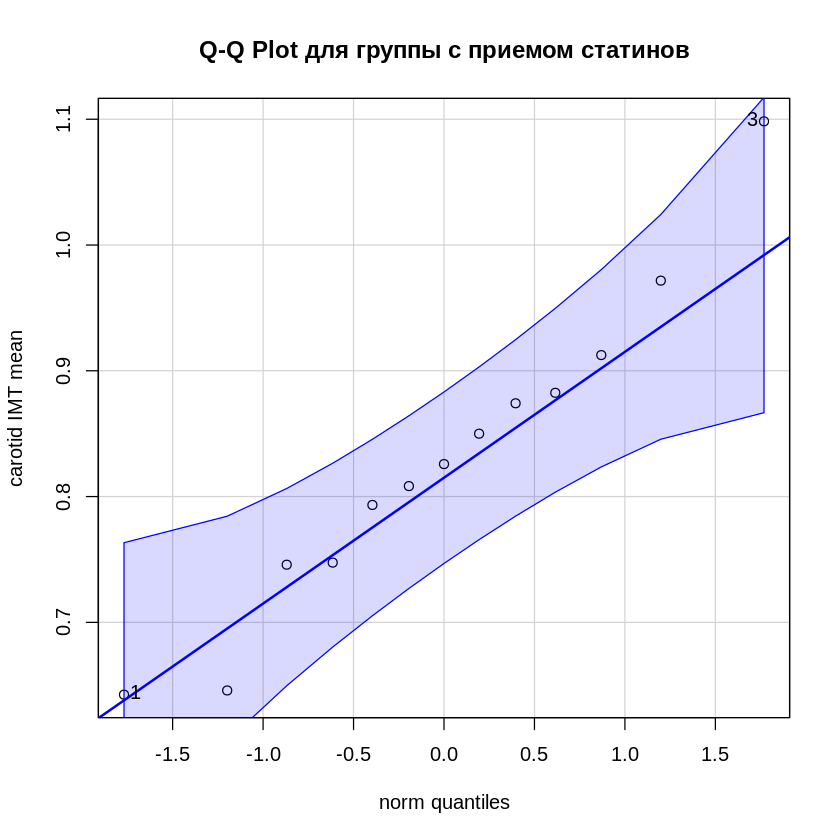

[1] 18 24

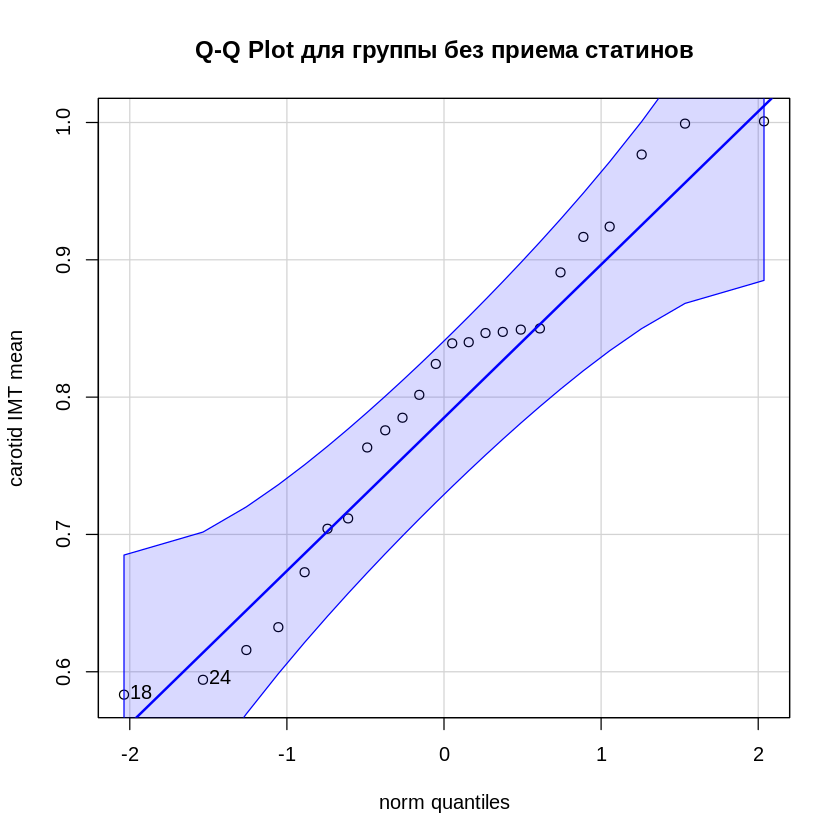

In [ ]:
# Проверка нормальности распределения для каждой группы
qqPlot(df_3$carotid.IMT.mean[df_3$Statins == 1], main = "Q-Q Plot для группы с приемом статинов", ylab = "carotid IMT mean")
qqPlot(df_3$carotid.IMT.mean[df_3$Statins == 0], main = "Q-Q Plot для группы без приема статинов", ylab = "carotid IMT mean")

In [ ]:
# Проверка однородности дисперсий
leveneTest(carotid.IMT.mean ~ Statins, data = df_3)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.01881845,0.8916744
,35,NA,NA


In [ ]:
# Тест Шапиро-Уилка на нормальность данных
shapiro.test(data$carotid.IMT.mean)


	Shapiro-Wilk normality test

data:  data$carotid.IMT.mean
W = 0.97518, p-value = 0.5488


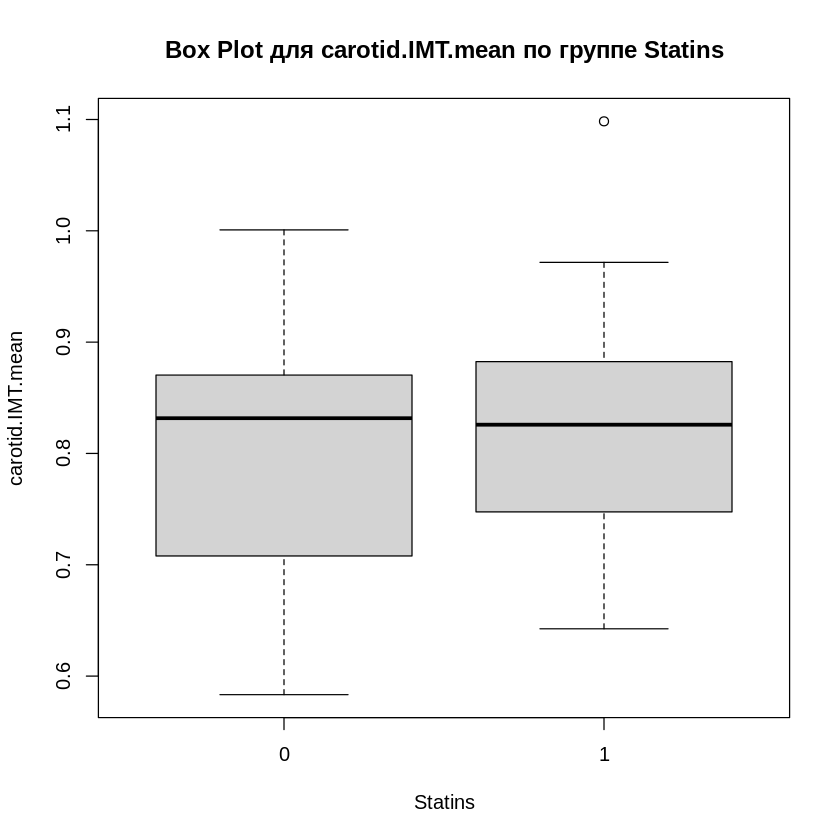

In [ ]:
# Построение box plot
boxplot(carotid.IMT.mean ~ Statins, data = df_3, xlab = "Statins", ylab = "carotid.IMT.mean", main = "Box Plot для carotid.IMT.mean по группе Statins")

Графики "квантиль-квантиль", тесты Левина и Шапиро-Уилка показывают, что переменная "carotid.IMT.mean" распределена нормально. При этом p-value = 0.5488 в тесте Уилка показывает, что нет достаточных оснований чтобы отвергнуть нулевую гипотезу. Это также подтверждается графиками box plot. Средние значения в обоих группах равны.